# Processed Heart Failure Data from Cleveland

<u><h2>Introduction:</h2></u>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; There are many indicators of the likelihood of heart disease in patients, often discernible through various traits. Heart failure typically occurs when the heart does not pump blood at a sufficient rate. It can cause fluid build-up in the lungs, resulting in symptoms such as shortness of breath, fatigue/weakness, nausea, coughing/wheezing, rapid weight gain, and chest pain. The Heart Failure dataset is collected from hospitals in Cleveland, Ohio. It analyzes many variables that could suggest the presence of heart disease, such as age and maximum heart rate achieved (bpm). The premise of our project revolves around a hypothetical situation in which we are required to determine the extent to which someone may be experiencing heart failure. The situation is as follows:

<blockquote><i>Working in the ER one day, you receive a patient who claims to be experiencing heart failure after a serious, in-depth WebMD self-diagnosis. The patient is a 52 year old man who is experiencing chest pain, however, he does not smoke, is in relatively good health, and has a maximum heart rate achieved of 152bpm. Using past data, it is your job to determine the extent to which this patient is experiencing heart failure, if at all.</i> </blockquote>

The question we are trying to answer is: How likely is a person to experience heart failure, based on their age and maximum heart rate (bpm)?
<br>
<hr>


<h3>Pre-Processing Stage</h3>
<b>Adding the necessary dependencies</b>

In [37]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(GGally)
library(tidymodels)
options(repr.matrix.max.rows = 6)
# loading libraries we will be using in our anaylsis

<br>
<b>Reading the dataset into R</b>

In [38]:
cleveland_data_download <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



<br>
<b>Renaming the columns into human readable labels and selecting the relevant variables</b>

In [39]:
colnames(cleveland_data_download) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")
cleveland_data_download
# renamed columns for more descriptive labels and easier use

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


<br>
<b>Attribute Information:</b>

Only 14 used:
X = not viable, 0 = factors, 1 = potential predictors
<ul>
    <li>1. #3 (age) - 1</li>
    <li>2. #4 (sex) - X</li>
    <li>3. #9 (cp) - 0</li>
    <li>4. #10 (trestbps) - 1</li>
    <li>5. #12 (chol) - 1</li>
    <li>6. #16 (fbs) - 0</li>
    <li>7. #19 (restecg) - 0</li>
    <li>8. #32 (thalach) - 1</li>
    <li>9. #38 (exang) - 0</li>
    <li>10. #40 (oldpeak) - X</li>
    <li>11. #41 (slope) - X</li>
    <li>12. #44 (ca) - X</li>
    <li>13. #51 (thal) - 0</li>
    <li>14. #58 (num) - 0; the predicted attribute</li>
</ul>

<br>
<b> Renaming the categories by combining them into a single category (heart-disease case)<b>

In [40]:
cleveland_mutated <- cleveland_data_download %>%
    mutate(num = as.factor(num)) %>%
    na.omit() %>%
    mutate(num = recode(num, '2' = '1')) %>%
    mutate(num = recode(num, '3' = '1')) %>%
    mutate(num = recode(num, '4' = '1'))
cleveland_mutated
# removed n/a values from the dataset
# mutated values of 2, 3, and 4 in last column to create a binary classification
# (the person is positive (1) or negative(0) for heart failure)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


In [41]:
cleveland_processed <- cleveland_mutated %>%
    select(age, trestbps, chol, thalach, oldpeak, num)
# selecting variables that are not binary to isolate scatterplots of non-binary variables 
cleveland_processed

age,trestbps,chol,thalach,oldpeak,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,145,233,150,2.3,0
67,160,286,108,1.5,1
67,120,229,129,2.6,1
⋮,⋮,⋮,⋮,⋮,⋮
57,130,131,115,1.2,1
57,130,236,174,0.0,1
38,138,175,173,0.0,0


<br>
<b>Using ggpairs to find the most suitable predictors </b>

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



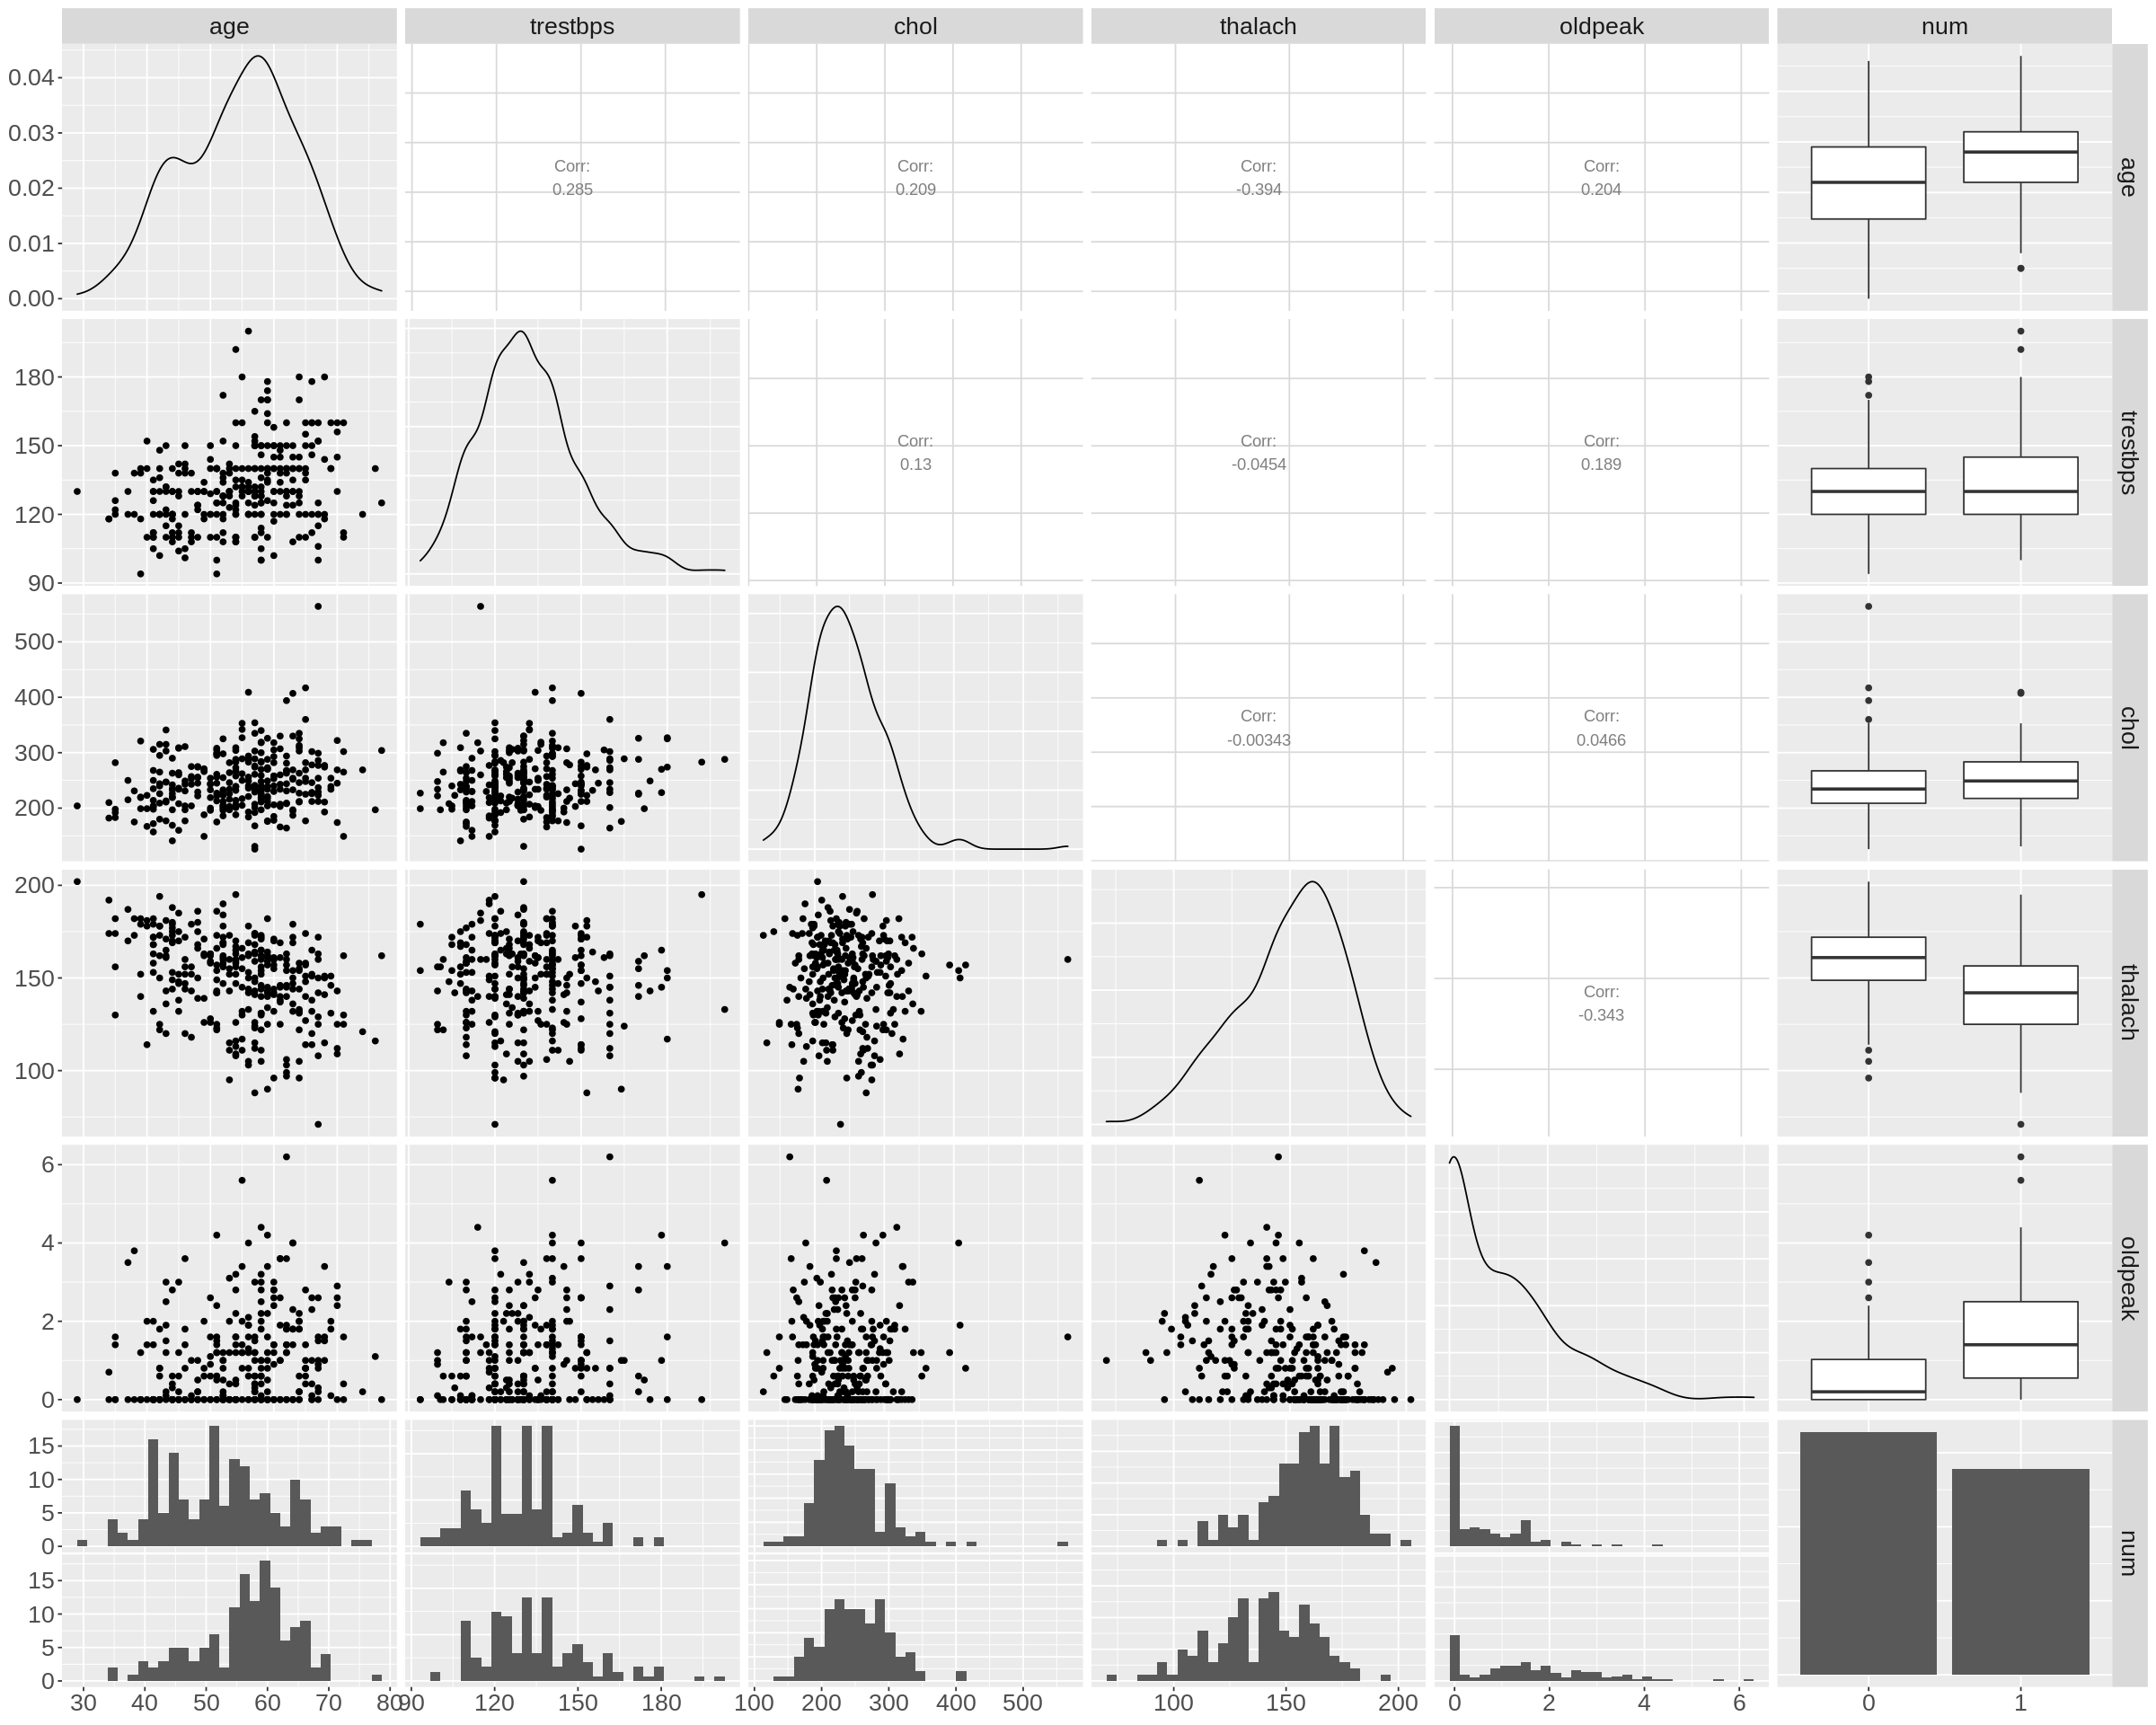

In [42]:
options(repr.plot.width = 20, repr.plot.height = 16)
cleveland_gg <- cleveland_processed %>%
                ggpairs() +
                theme(text = element_text(size = 20))
cleveland_gg
# using ggpairs to visualize the relationships between variables and to determine which variables to
# plot against each other

In [43]:
cleveland_select <- cleveland_processed %>%
    select(age, thalach, num)
cleveland_select
# selected variables with strongest correlation coefficient (age/thalach = -0.394)

age,thalach,num
<dbl>,<dbl>,<fct>
63,150,0
67,108,1
67,129,1
⋮,⋮,⋮
57,115,1
57,174,1
38,173,0


<br>
<b>Visulizing the proportions between the number of heart disease and non-heart disease cases</b>

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


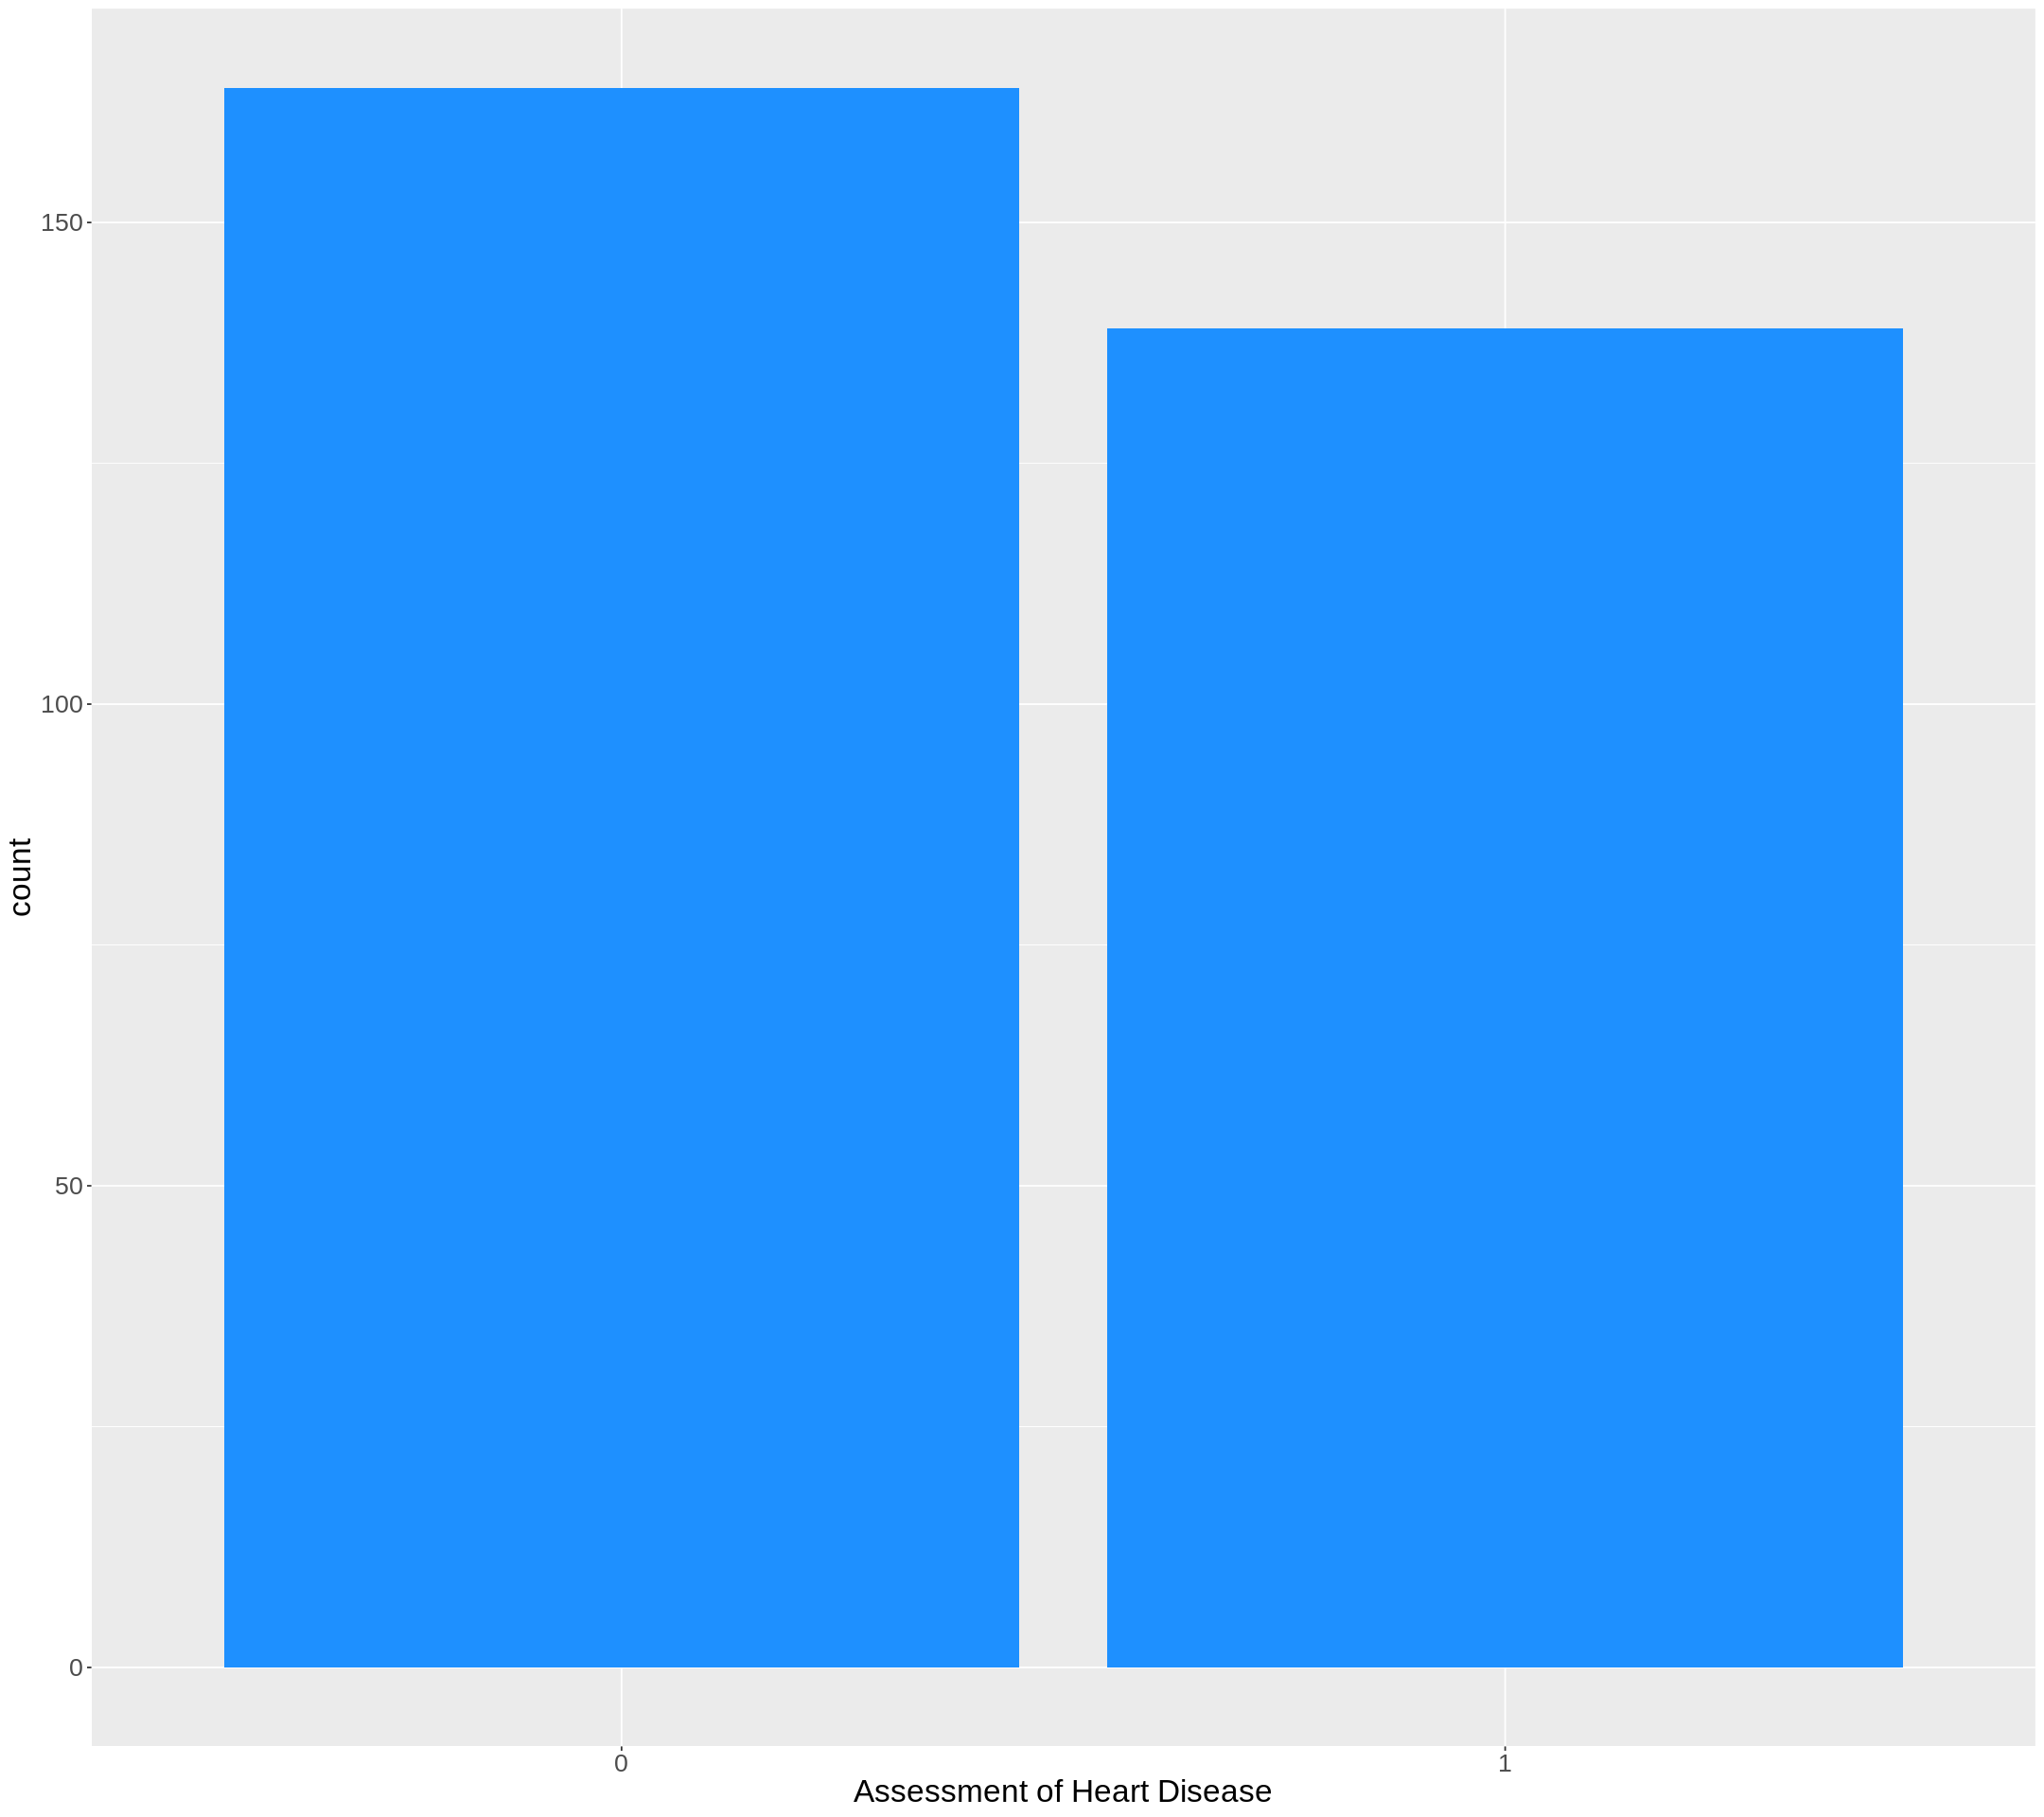

In [59]:
cleveland_prop <- cleveland_select %>%
                  ggplot(aes(x = num)) +
                  geom_histogram(stat = "count", fill = "dodgerblue") +
                  xlab("Assessment of Heart Disease") +
                  theme(text = element_text(size = 20))
cleveland_prop
# visualizing the count of each class of the predicted attribute in the training data

In [45]:
cleveland_sd_mean <- cleveland_select %>%
    summarize(sd_age = sd(age), mean_age = mean(age), sd_thalach = sd(thalach), mean_thalach = mean(thalach))
cleveland_sd_mean
# calculating standard deviation and mean of each variable to understand the spread of the data

sd_age,mean_age,sd_thalach,mean_thalach
<dbl>,<dbl>,<dbl>,<dbl>
9.038662,54.43894,22.875,149.6073


<hr>
<h3> Starting the data analysis </h3>
<b>Splitting the data set into the training and testing sets</b>

In [46]:
set.seed(42069)
cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_training <- training(cleveland_split)
cleveland_testing <- testing(cleveland_split)
cleveland_training
# splitting the data into training and testing sets

age,thalach,num
<dbl>,<dbl>,<fct>
67,108,1
37,187,0
41,172,0
⋮,⋮,⋮
68,141,1
57,174,1
38,173,0


<br>
<b>Visualizing the predictors in a scatter plot</b>

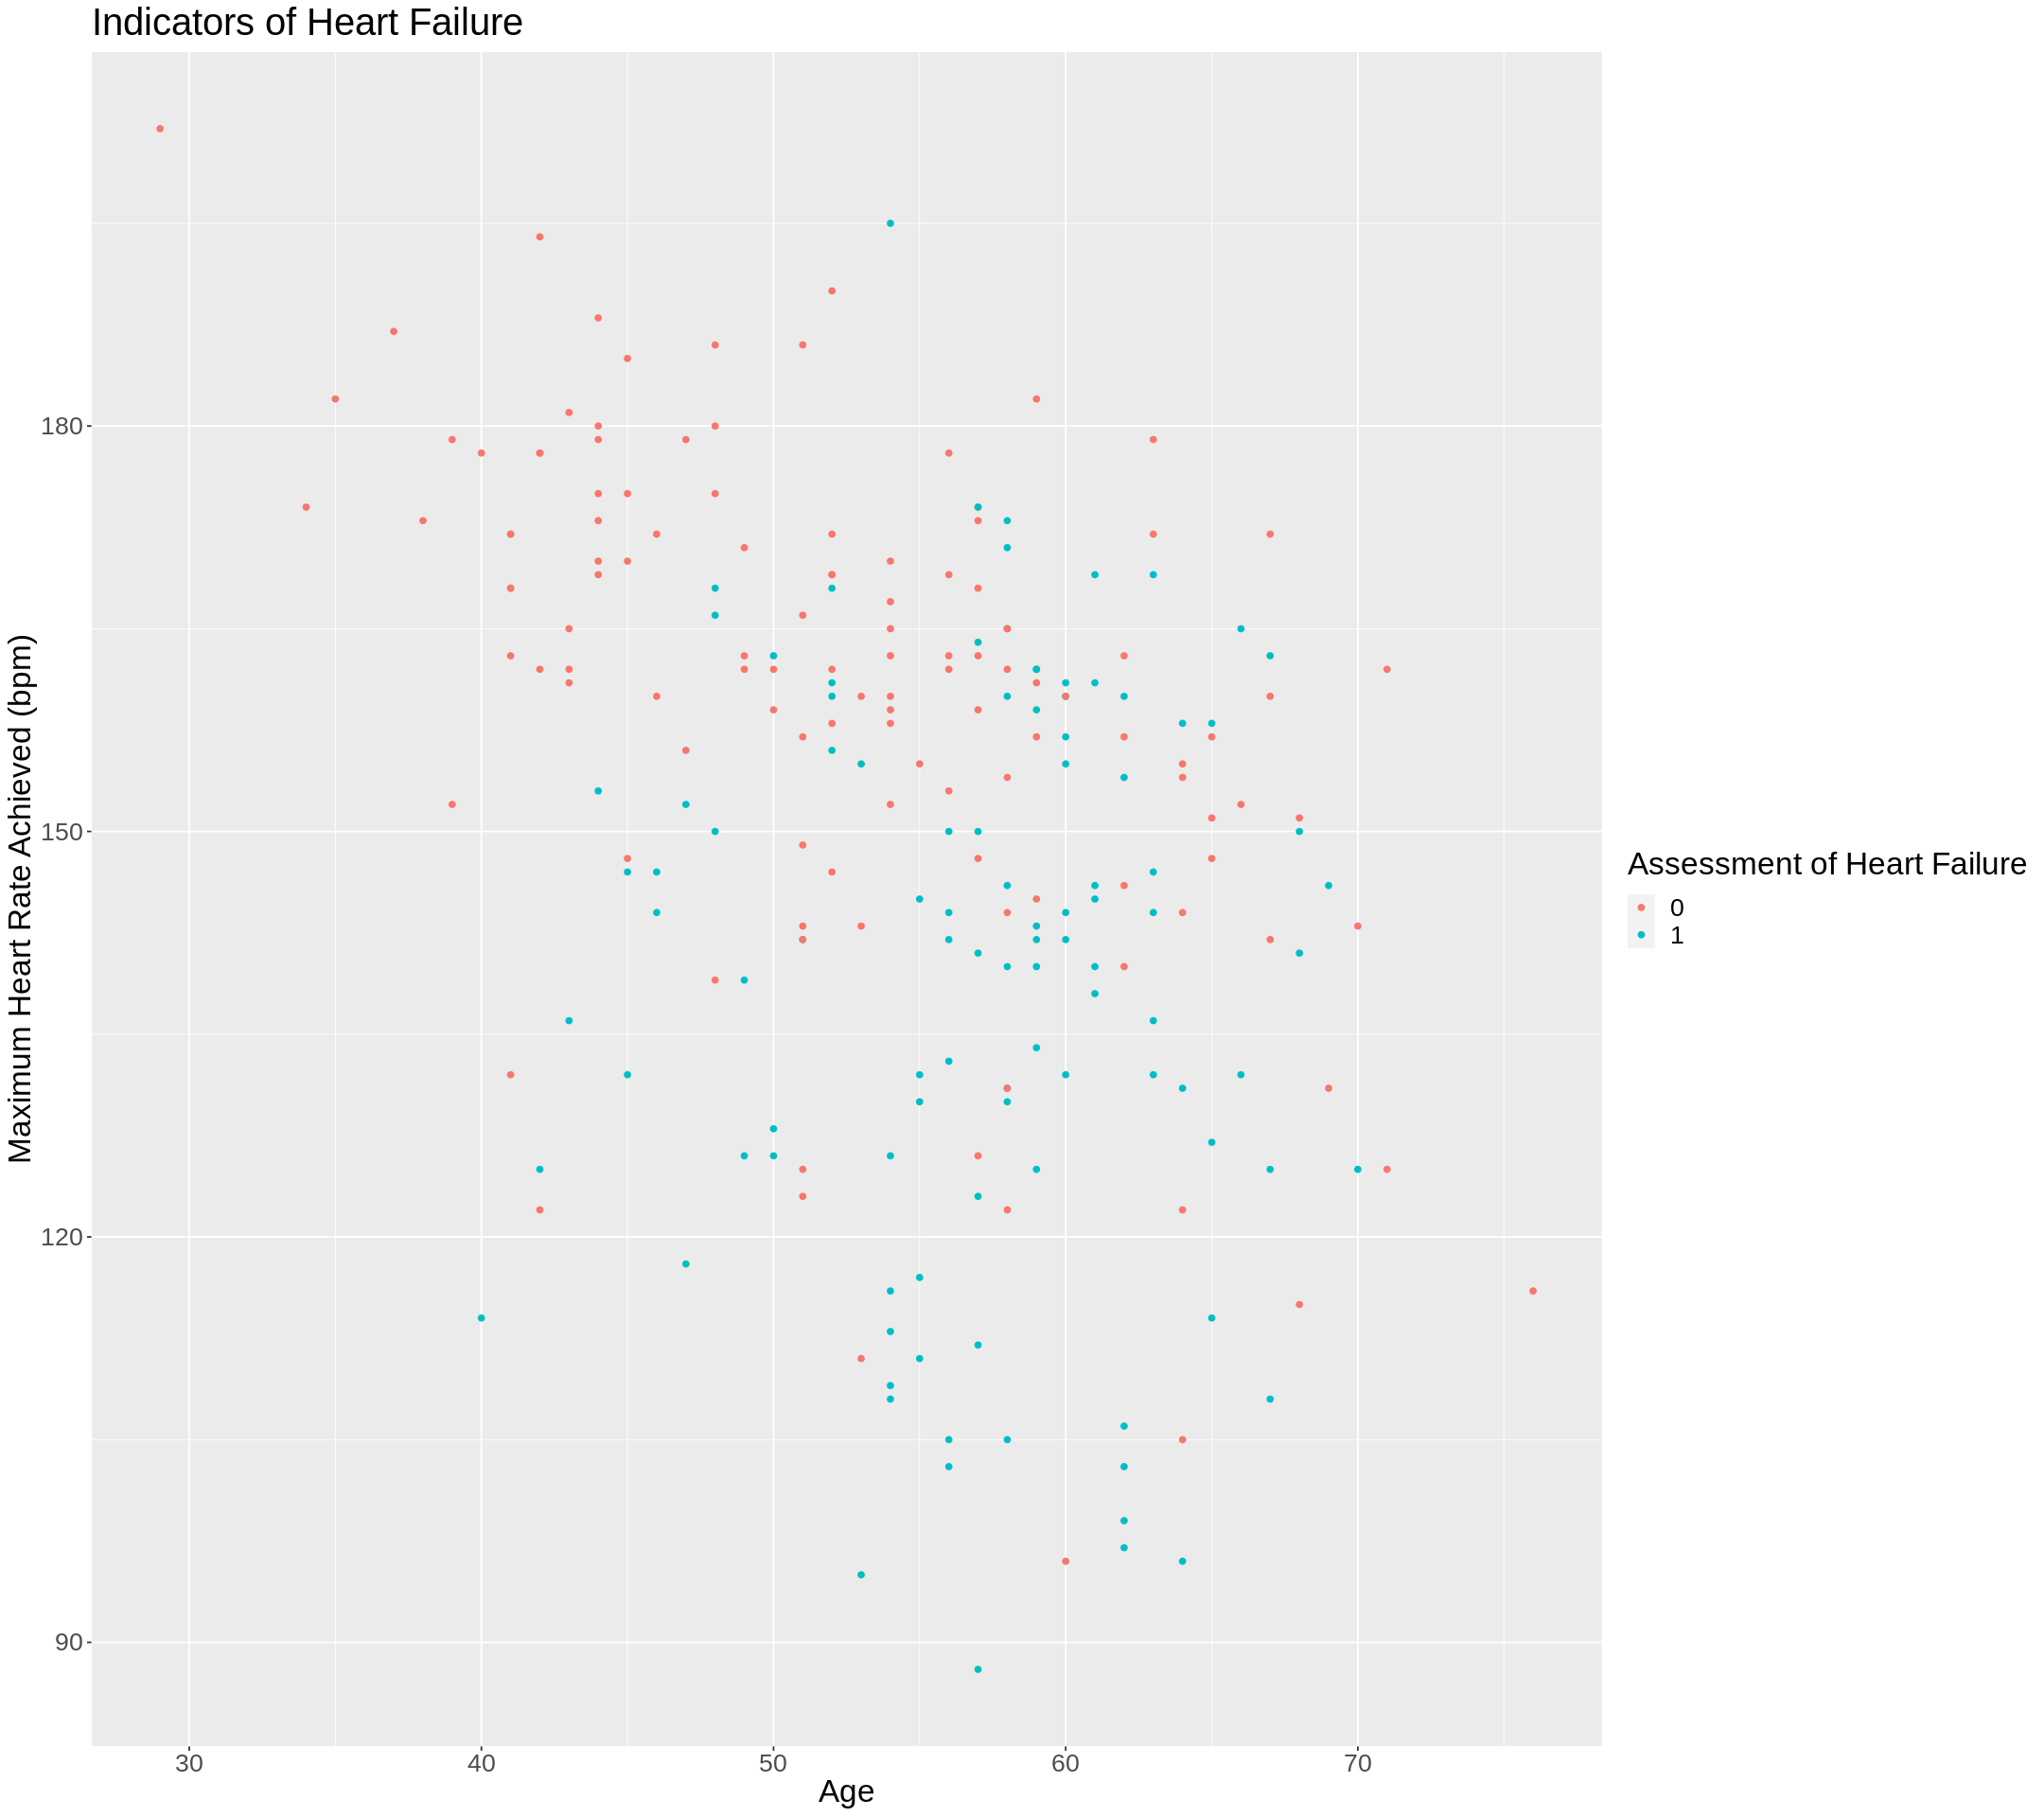

In [58]:
options(repr.plot.width = 18, reppr.plot.height = 3)
cleveland_plot <- cleveland_training %>%
    ggplot(aes(x = age, y = thalach, color = num)) +
    geom_point() +
    labs(x = "Age", y = "Maximum Heart Rate Achieved (bpm)", color = "Assessment of Heart Failure") +
    ggtitle("Indicators of Heart Failure") +
    theme(text = element_text(size=20))
cleveland_plot
# plotting the training data for reference

<br>
<b>Visulizing the proportions between the number of heart disease and non-heart disease cases</b>

<br>
<b>Creating the folds to use for the cross-validation process</b>

In [48]:
heart_fold <- vfold_cv(cleveland_training, v = 5, strata = num)

<br>
<b>Creating the recipe for our classifier</b>

In [49]:
heart_recipe <- recipe(num ~ ., data = cleveland_training) %>%
    step_scale(all_predictors()) %>%
    step_center(all_predictors())
heart_recipe
# made the recipe based off of the training data

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor          2

Operations:

Scaling for all_predictors()
Centering for all_predictors()

<br>
<b>Creating the nearest neighbor model for the cross-validation process<b>

In [50]:
heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>% 
    set_engine("kknn") %>%      # select K-nearest Neighbors classificaiton algorithim
    set_mode("classification")  # indicates that this recipe will be used for a classification problem
heart_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


<br>
<b>Set the number of K values we want to cross-validate</b>

In [51]:
gridvals <- tibble(neighbors = c(1:20))
# made a tibble of potential values of k

In [52]:
heart_fit <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(heart_spec) %>%
    tune_grid(resamples = heart_fold, grid = gridvals) %>%
    collect_metrics()
heart_fit

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6359420,5,0.03942414,Model01
1,roc_auc,binary,0.6360476,5,0.04113577,Model01
2,accuracy,binary,0.6359420,5,0.03942414,Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
19,roc_auc,binary,0.7754524,5,0.03034614,Model19
20,accuracy,binary,0.6932367,5,0.02226943,Model20
20,roc_auc,binary,0.7763730,5,0.03106711,Model20


**K vs Accuracy Plot**

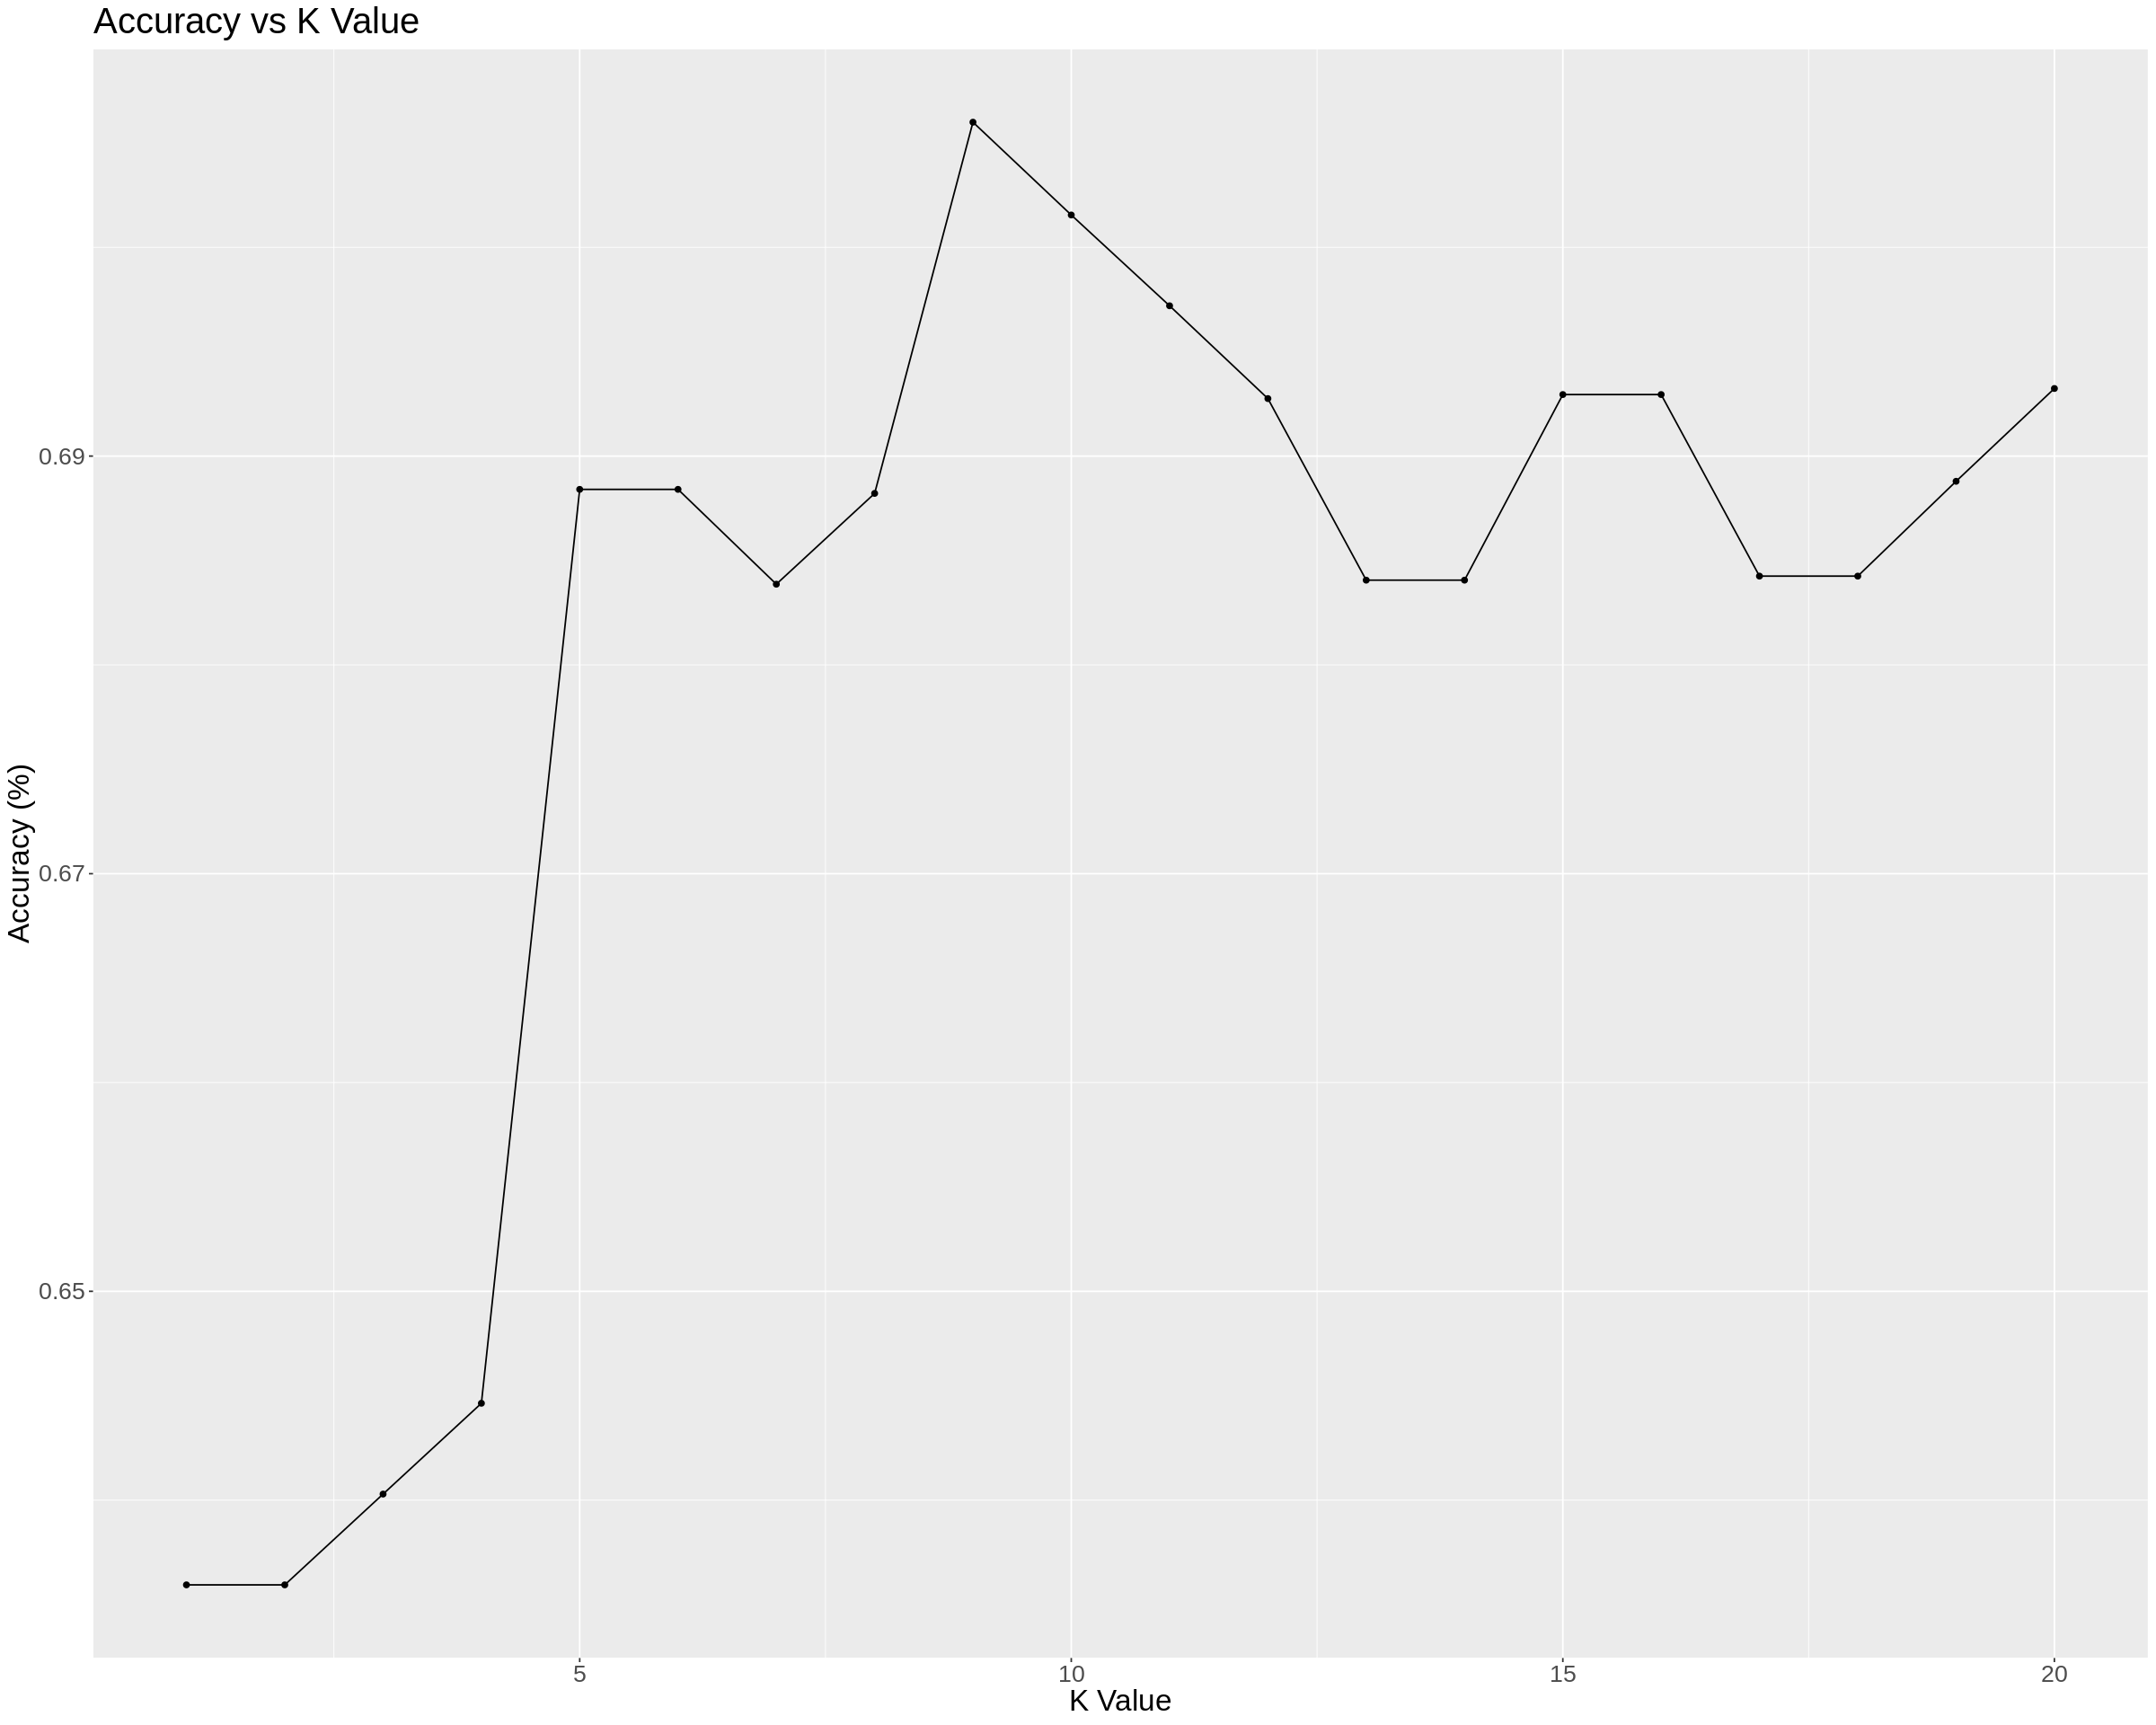

In [53]:
#Plotting the K vs Accuracy plot, putting the K values on the x-axis and the accuracy on the y axis
k_accuracy_plot <- heart_fit %>%
                   filter(.metric == "accuracy") %>%
                   ggplot(aes(x = neighbors, y = mean)) +
                   geom_point() +
                   geom_line() +
                   labs(x = "K Value", y = "Accuracy (%)") +
                   ggtitle("Accuracy vs K Value") +
                   theme(text = element_text(size = 20))

k_accuracy_plot

In [54]:
k_best <- heart_fit %>%
    filter(.metric == "accuracy") %>%
    arrange(desc(mean)) %>%
    select(neighbors) %>%
    slice(1) %>%
    pull()
k_best
# determined the best k value based on accuracy from the metrics found in the tune_grid function

[1] 9

In [55]:
best_heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = k_best) %>%
    set_engine("kknn") %>%
    set_mode("classification")
# created new model with best k value found in previous step

heart_fit_best <- workflow() %>%
    add_recipe(heart_recipe) %>%
    add_model(best_heart_spec) %>%
    fit(cleveland_training)
heart_fit_best
# fit training data to new model

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

● step_scale()
● step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = ~k_best,     kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2675439
Best kernel: rectangular
Best k: 9

In [56]:
heart_summary <- heart_fit_best %>%
    predict(cleveland_testing) %>%
    bind_cols(cleveland_testing) %>%
    metrics(truth = num, estimate = .pred_class) %>%
    filter(.metric == "accuracy")
heart_summary
# determining the accuracy of our model with the testing subset of data

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.6266667


<br>
<b> The predicted heart assessment for our patient</b>

In [57]:
# stats for the patient
patient <- tibble(age = 52, thalach = 152)
patient_diagnosis <- predict(heart_fit_best, patient)
patient_diagnosis

.pred_class
<fct>
0


<hr>
<h2><u>Methods and Results</u></h2> 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;For the purpose of this data analysis, we will be utilizing Git for our version control system and GitHub to store our data analysis in a cloud-based repository.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Using several tidying techniques, we have cleaned and wrangled the data to make it easier to discern. First, we <b>read the data</b> into Jupyter using the read_csv function, downloading the data directly from the UCI webpage. Previewing the data in a table, we noticed that the original column names were x1, x2, x3, etc.. Therefore, we <b>renamed the columns</b> using the complete attribute documentation (see above) that we found on the UCI page (“age”, “sex”, “cp”, etc.).


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Also, since the presence and/or severity of heart disease is presented as a numerical value from 0 to 4, (with 0 indicating the absence of heart disease, and numbers 1-4 indicating the severity of the present heart disease, 4 being most severe) we wanted to transform the data into a binary class in order to make a simpler and better classification. Thus, we **mutated the data** and changed all values greater than 1 to become 1, with 0 representing a healthy individual and 1 representing an individual with heart disease.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Then, we had to **select variables** that were not binary in order to isolate scatterplots of non-binary variables. For example, we did not select “sex”, “cp”, “trestbps”, etc., because although they had numerical values, those numbers corresponded to categorical classes that were not actually meaningful. We were left with five predictors: age, resting blood pressure, cholesterol, maximum heart rate achieved, ST depression induced by exercise relative to rest, and the angiographic disease status (diagnosis of heart disease). We summarized the data in another table.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;From there, we used the **ggpairs function** to see which predictors would be most suitable in predicting the likelihood of heart failure. We were able to see the <i>correlation coefficients</i> between those five variables, which are numerical values that range from -1 to 1. They represent how significant of a relationship there is between two variables. The closer to -1, the stronger the negative correlation. The closer to 1, the stronger the positive correlation. Examining the ggpairs plots, we can observe that the correlation between “age” and “thalach” is -0.394, which is the largest correlation out of all non-binary variables. Therefore, we concluded that age and maximum heart rate achieved were appropriate predictors for heart failure.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;After that, we **selected the columns** that corresponded to age, maximum heart rate achieved, and the presence and/or severity of heart disease. We named this set cleveland_select, and this will be the basis of our training and testing datasets. 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Next, we **set the seed** as a random number, and then proceeded to **split the data** into training and testing sets with a proportion of 75% for the training data. By setting a seed, we can ensure that our data analysis results are reproducible. Moreover, we chose 75% as the proportion because we wanted to have a training set that is substantially larger than the testing set. Having a larger training set to train our classifier ensures that the classifier is reliable and  has enough information on which to base a new prediction.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In order to visualize the data, we created a **scatter plot** using the geom_point function with age on the x-axis and maximum heart rate on the y-axis, including human-readable labels and a necessary title to help with the clarity of the visualization. We **colored** values 0 and 1, with 0 indicating the absence of heart disease, and 1 indicating the severity of the presence of heart disease. From here, we were able to observe the relationship between age and maximum heart rate with regard to heart disease. This is our main form of visualization because we aim to observe the relationship between two unordered variables, plotted as points on a graph. We also chose to create a **histogram** to visualize the proportion between the number of heart disease and non-heart disease cases. This will indicate whether the chosen data set contains balanced proportions of the non-heart disease and heart disease cases. 

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We decided to use **cross-validation** because it ensures each observation in the data set is used in a validation set a single time. Splitting our training data into five evenly-sized chunks, 5-fold cross-validation computes the accuracy for each chunk and results in five different choices for the validation set so that we can test different values of K. From there, we were able to **create a recipe** and **model specification**, using neighbors = tune(), in attempts to determine the best value of K. To do this, we had to **create a tibble** and **collect the metrics** to pull the best value of K. It was determined to be k = 9. In order to visualize this, we plotted Accuracy vs. K and observed that at k = 9, the percentage accuracy is the highest for our classifier. We then used that value to **create a new model specification** and **re-fit** the data.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Once we generated a **summary** and **filtered for accuracy**, we determined the accuracy of our classifier to be <i>0.6266667</i>. This result indicates that our classifier is correct about 62.66667% of the time. In addition, we used the predict function to **predict the class** of a person of age 52 and maximum heart rate achieved of 152bpm. Given that the value produced was 0, it means that this person would not be considered to be experiencing heart failure.

<blockquote>As you consider past data and your patient, you decide that you can diagnose the patient as not experiencing heart failure. This also means you now have to break the news to him that his WebMD self-diagnosis was false.</blockquote>


<h2><u>Discussion</u></h2>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;We found a 0.6266667 (62.66667%)  accuracy for our classifier. 


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our model determines the extent to which, if at all, a person would experience heart failure based on their age and maximum heart rate (bpm). According to our model, we found that the new patient was **not experiencing heart failure.** Whilst examining the dataset, this prediction seems realistic and it is what we expected to find. Such findings could be used by medical institutions to compare past data with new data and make assumptions. They could also be used on a smaller scale, to allow individuals to predict for themselves the likelihood of experiencing heart failure at various times of their life. After completing this analysis, new questions may be posed. For instance, we can consider how our model would change if we included more predictors in our recipe, such as cholesterol or number of cigarettes smoked per day. We imagine it would provide more valuable predictions, and could increase accuracy of our model. Overall, our findings are valuable and this dataset is worth exploring further to answer more in-depth predictive questions.


<hr>
<h2><u>References:</u></h2>

Timbers, T. A., Campbell, T., & Lee, M. (2021). Data Science: A First Introduction. https://ubc-dsci.github.io/introduction-to-datascience/.

David W. Aha & Dennis Kibler. "Instance-Based Prediction of Heart-Disease Presence With the Cleveland Database." Retrieved November 25, 2021, from https://rdrr.io/cran/MixAll/man/HeartDisease.html.

Heart Disease Data Set. UCI Machine Learning Repository. (n.d.). Retrieved November 25, 2021, from https://archive.ics.uci.edu/ml/datasets/Heart+Disease.

Mayo Foundation for Medical Education and Research. (2021, July 21). Heart Failure. Mayo Clinic. Retrieved November 25, 2021, from https://www.mayoclinic.org/diseases-conditions/heart-failure/symptoms-causes/syc-20373142.